To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# A Short Intro to Graph Construction

In this tutorial we will learn how to create different types of graphs using the Python libraries "NumPy", "NetworkX" and "SciPy". 

First, let's start by importing the libraries. "csgraph" and "csr_matrix" are for sparse graph and sparse matrix operations, respectively.

In [2]:
import numpy as np
import networkx as nx
from scipy.sparse import csr_matrix, csgraph

The Python library "NetworkX" supports both directed and undirected graphs through four classes:

- Graph (undirected, self loops)
- DiGraph (directed, self loops)
- MultiGraph (undirected, multiple edges, self loops)
- MultiDiGraph (directed, multiple edges, self loops)

# MultiGraph

First, we start with the MultiGraph class. The graph "G1" has four nodes(vertices).

In [3]:
G1 = nx.MultiGraph()
G1.add_nodes_from([
    (0, {"color": "black"}),
    (1, {"color": "black"}),
    (2, {"color": "black"}),
    (3, {"color": "black"}),
])

Next, we create three lists for the edges of the graph "G1". The number of edges between node pairs are two for each of the pair of nodes "0-1" and "1-2". There is only one edge between each of the pair of nodes "0-3", "1-3" and "2-3".

In [4]:
elistsingle = [(0, 3), (1, 3), (2, 3)]
elistmultiple1 = [(0, 1), (1, 2)]
elistmultiple2 = [(1, 0), (2, 1)]
elist = elistsingle+elistmultiple1+elistmultiple2
G1.add_edges_from(elist)

[0, 0, 0, 0, 0, 1, 1]

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [5]:
nodepos = {
    0:np.array([1.0,3.0]),
    1:np.array([1.0,2.0]),
    2:np.array([1.0,1.0]),
    3:np.array([2.0,2.0])
}

Finally, we are ready to draw our graph "G1". The order for drawing is as follows:
1. nodes
2. node labels
3. single edges
4. multiple edges

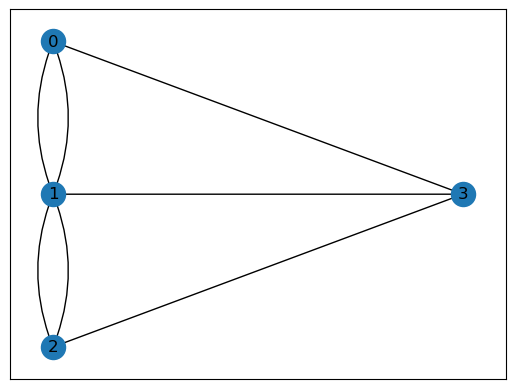

In [6]:
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elistsingle, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elistmultiple1, arrows=True, connectionstyle='arc3, rad = 0.2')
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elistmultiple2, arrows=True, connectionstyle='arc3,rad = 0.2')

To get information on the graph "G1":

In [7]:
print(G1)

MultiGraph with 4 nodes and 7 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [8]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	2
  (0, 3)	1
  (1, 0)	2
  (1, 2)	2
  (1, 3)	1
  (2, 1)	2
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1


To have the adjacency matrix of the graph "G1" in dense form:

In [9]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[0 2 0 1]
 [2 0 2 1]
 [0 2 0 1]
 [1 1 1 0]]


To put back the adjacency matrix of the graph "G1" in the sparse form:

In [10]:
G1_sparse = csr_matrix(G1_dense)
print(G1_sparse)

  (0, 1)	2
  (0, 3)	1
  (1, 0)	2
  (1, 2)	2
  (1, 3)	1
  (2, 1)	2
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1


To have the adjacency matrix of the graph "G1" again in dense form:

In [11]:
G1_dense2 = csgraph.csgraph_to_dense(G1_sparse)
print(G1_dense2)

[[0. 2. 0. 1.]
 [2. 0. 2. 1.]
 [0. 2. 0. 1.]
 [1. 1. 1. 0.]]


# Graph

Now, we create another graph "G2" having the Graph class. 

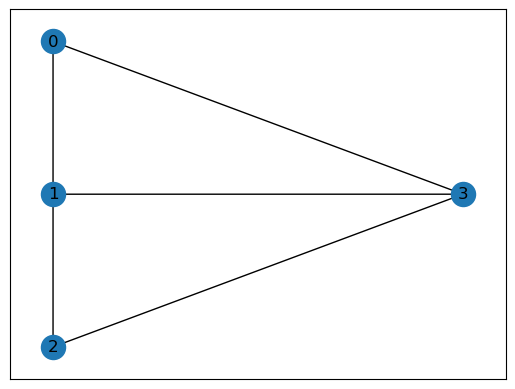

In [12]:
G2 = nx.Graph()
G2.add_nodes_from([
    (0, {"color": "black"}),
    (1, {"color": "black"}),
    (2, {"color": "black"}),
    (3, {"color": "black"}),
])
elist = elistsingle+elistmultiple1
G2.add_edges_from(elist)
nx.draw_networkx_nodes(G2, pos = nodepos)
nx.draw_networkx_labels(G2, pos = nodepos)
nx.draw_networkx_edges(G2, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')

Then, we can get information on the graph "G2" as follows:

In [13]:
print(G2)

Graph with 4 nodes and 5 edges


In [14]:
G2Adj = nx.adjacency_matrix(G2)
G2_dense = np.array(G2Adj.todense())
print(G2_dense)

[[0 1 0 1]
 [1 0 1 1]
 [0 1 0 1]
 [1 1 1 0]]


In [15]:
G2_sparse = csr_matrix(G2_dense)
print(G2_sparse)

  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1


In [16]:
G2_dense2 = csgraph.csgraph_to_dense(G2_sparse)
print(G2_dense2)

[[0. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]]


# DiGraph

The graph "G3" belongs to the class of DiGraph.

In [17]:
G3 = nx.DiGraph()
G3.add_nodes_from([
    (0, {"color": "black"}),
    (1, {"color": "black"}),
    (2, {"color": "black"}),
    (3, {"color": "black"}),
])

The edges of the graph "G3" are both directed and weighted. The last numerical value in the Python tuples is for the weight of the corresponding edge.

{(0, 1): Text(1.0, 2.3, '3.0'),
 (0, 3): Text(1.7, 2.3, '5.0'),
 (1, 2): Text(1.0, 1.2999999999999998, '4.0'),
 (1, 3): Text(1.7, 2.0, '7.0'),
 (1, 0): Text(1.0, 2.6999999999999997, '4.0'),
 (2, 3): Text(1.7, 1.7, '9.0'),
 (2, 1): Text(1.0, 1.7, '3.0'),
 (3, 0): Text(1.2999999999999998, 2.6999999999999997, '5.0'),
 (3, 1): Text(1.2999999999999998, 2.0, '7.0'),
 (3, 2): Text(1.2999999999999998, 1.2999999999999998, '11.0')}

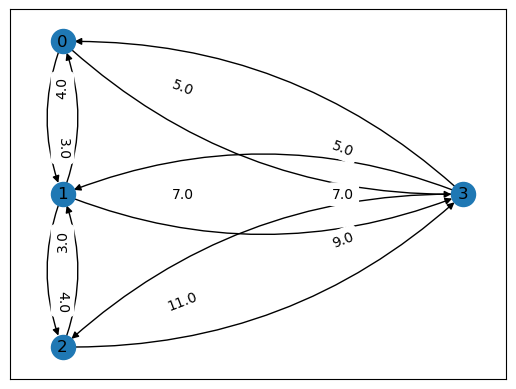

In [18]:
elist1 = [(0, 1, 3.0), (1, 2, 4.0), (0, 3, 5.0), (1, 3, 7.0), (2, 3, 9.0)]
elist2 = [(1, 0, 4.0), (2, 1, 3.0), (3, 0, 5.0), (3, 1, 7.0), (3, 2, 11.0)]
G3.add_weighted_edges_from(elist1+elist2)
nx.draw_networkx_nodes(G3, pos = nodepos)
nx.draw_networkx_labels(G3, pos = nodepos)
nx.draw_networkx_edges(G3, pos = nodepos, edgelist=elist1, arrows=True, connectionstyle='arc3, rad = 0.2')
nx.draw_networkx_edges(G3, pos = nodepos, edgelist=elist2, arrows=True, connectionstyle='arc3, rad = 0.2')
nx.draw_networkx_edge_labels(G3, pos = nodepos, edge_labels = nx.get_edge_attributes(G3,'weight'), label_pos = 0.3)

The information on the graph "G3" is as follows:

In [19]:
print(G3)

DiGraph with 4 nodes and 10 edges


In [20]:
G3Adj = nx.adjacency_matrix(G3)
G3_dense = np.array(G3Adj.todense())
print(G3_dense)

[[ 0.  3.  0.  5.]
 [ 4.  0.  4.  7.]
 [ 0.  3.  0.  9.]
 [ 5.  7. 11.  0.]]


In [21]:
G3_sparse = csr_matrix(G3_dense)
print(G3_sparse)

  (0, 1)	3.0
  (0, 3)	5.0
  (1, 0)	4.0
  (1, 2)	4.0
  (1, 3)	7.0
  (2, 1)	3.0
  (2, 3)	9.0
  (3, 0)	5.0
  (3, 1)	7.0
  (3, 2)	11.0


In [22]:
G3_dense2 = csgraph.csgraph_to_dense(G3_sparse)
print(G3_dense2)

[[ 0.  3.  0.  5.]
 [ 4.  0.  4.  7.]
 [ 0.  3.  0.  9.]
 [ 5.  7. 11.  0.]]
